<a href="https://colab.research.google.com/github/AadarshPandey29/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing important libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Loading the dataset into pandas dataframe
gld_data = pd.read_csv("/content/drive/MyDrive/Datasets/gld_price_data.csv")

In [3]:
# Getting the gist of our data by getting the 1st 5 rows of the data
gld_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# Getting the number of rows and columns in the data
gld_data.shape

(2290, 6)

In [5]:
# Checking for the null values in the dataset
gld_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

As there is no null values present in our dataset, it makes our work alot easier.

In [8]:
# Getting the info of the dataset
gld_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


**Data Analysis**

In [7]:
# Getting the statistical values of our data
gld_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Correlation**

In [9]:
correlation = gld_data.corr()

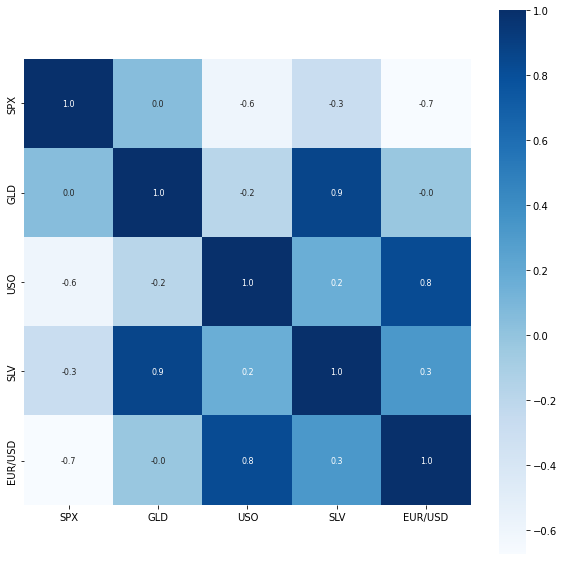

In [14]:
# Constructing the heatmap to understand the correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')
plt.show()

In [15]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


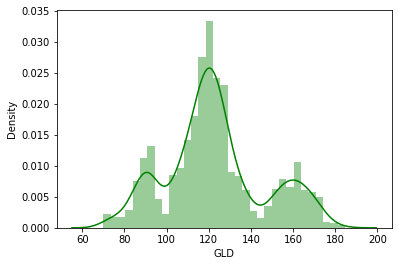

In [19]:
# Check the distribution of the gold price
sns.distplot(gld_data['GLD'], color = 'Green')

**Splitting of the data**

In [20]:
X = gld_data.drop(['Date', 'GLD'], axis = 1)
Y = gld_data['GLD']

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [23]:
# Splitting the Train data and the Test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

**Model Training**

**Random Forest Regressor**

In [24]:
reg = RandomForestRegressor()

In [26]:
# Training the Model
reg.fit(X_train, Y_train)

RandomForestRegressor()

**Model Evaluation**

In [27]:
# Prediction on the Train Data
train_data_prediction = reg.predict(X_train)

In [28]:
print(train_data_prediction)

[110.01609767 114.6062008   90.62500021 ... 130.539497   159.69799604
 114.61579997]


In [29]:
# Prediction on the Test Data
test_data_prediction = reg.predict(X_test)

In [30]:
print(test_data_prediction)

[168.69929944  81.91399991 116.39220031 127.67130079 120.79740167
 154.73119748 150.64989803 126.24349975 117.48069875 126.04360044
 116.61230125 171.85840102 141.79559833 167.85539842 115.15790041
 117.47690063 137.88410402 170.13540074 159.68300251 159.3469993
 155.23590052 125.6904001  175.86589947 157.20070329 125.26890048
  93.69099976  76.93930037 120.79840004 119.16679961 167.52290004
  88.16510066 125.28369999  91.15220091 117.83730002 121.12199907
 136.17420094 115.6436015  115.36060077 148.59519942 107.18630121
 104.49930221  87.15139798 126.39720067 117.69740007 153.27159932
 119.72809985 108.35999983 108.01659843  93.22310037 127.07189808
  74.92520029 113.74139942 121.40950011 111.20969901 118.77169896
 120.50479957 159.48270116 167.09970151 146.88869629  86.1680988
  94.34710029  86.78759851  90.24750038 119.0213006  126.43000055
 127.54149999 168.0338995  122.36509927 117.18869907  98.34920057
 167.55920048 142.81199775 132.36190237 121.25600178 120.73309961
 119.6532006

In [32]:
# R sqaure Error
error_score = metrics.r2_score(test_data_prediction, Y_test)
print("The r2 value for the model is:", error_score)

The r2 value for the model is: 0.9888879184834868


**Comparing the Actual Values and Predicted Values**

In [35]:
Y_test = list(Y_test)

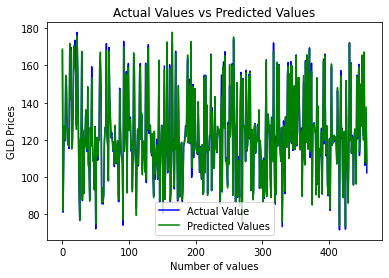

In [39]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Values')
plt.title("Actual Values vs Predicted Values")
plt.xlabel("Number of values")
plt.ylabel('GLD Prices')
plt.legend()
plt.show()